In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pylab as plt
import pandas as pd

In [2]:
class System:
    def __init__(self, alpha=0.005, zeta=0.1, pi=0, beta=0.0095, delta=0.0001):
        self.alpha = alpha; self.zeta=zeta; self.pi=pi; self.beta=beta; self.delta=delta
    def __call__(self, y, t):
        S = y[0]; Z = y[1]; R = y[2]
        dS = self.pi - self.beta*S*Z - self.delta*S
        dZ = self.beta*S*Z + self.zeta*R - self.alpha*S*Z
        dR = self.delta*S + self.alpha*S*Z - self.zeta*R
        return (dS, dZ, dR)

In [3]:
data = pd.DataFrame(columns=('t', 'S', 'Z', 'R'))
system = System()

Y0 = (500, 0, 0)
t_end = 50; t_cull = 10
k = 0.25
for i in range(round(t_end/ t_cull)):
    t = np.linspace(t_cull * i, t_cull * (i+1), 100)
    y = scipy.integrate.odeint(system, Y0, t)
    Y0 = y[-1, :]
    n_cull = k * Y0[1]
    Y0[1] -= n_cull
    Y0[2] += n_cull
    data = data.append(pd.DataFrame(np.hstack((t.reshape(-1, 1), y)), columns=('t', 'S', 'Z', 'R')))

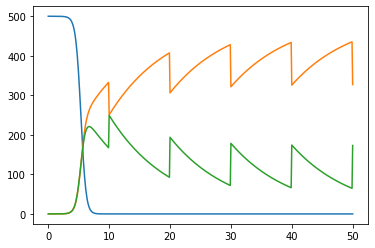

In [7]:
plt.plot(data['t'], data[['S', 'Z', 'R']])
plt.show()